In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.units as u

In [ ]:
import webbrowser

webbrowser.open('http://www.openexoplanetcatalogue.com/systems/') 


In [2]:

from importlib.metadata import version

import lightkurve as lk
print(version('lightkurve'))

from lightkurve import search_targetpixelfile
from lightkurve import search_lightcurve

2.0.9


In [3]:
def PlotTarget(target, i, targetstring):
    import matplotlib.pyplot as plt

    plt.rcParams.update({'figure.max_open_warning': 0})
    
    lc = lk.search_lightcurve(target)[i].download();
    lc.plot()
    plt.title(str(target) + " (" + str(i) + ")" + str(targetstring));
    
    period = np.linspace(1, 20, 10000)
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
    

    planet_period = bls.period_at_max_power
    planet_t0 = bls.transit_time_at_max_power
    planet_dur = bls.duration_at_max_power

    bls.plot()
    plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\nPeriod: " + str(planet_period));



In [4]:
def PlotTarget2(target, i, targetstring):
    import matplotlib.pyplot as plt

    plt.rcParams.update({'figure.max_open_warning': 0})
    
    lc = lk.search_lightcurve(target)[i].download();
    lc.plot()
    plt.title(str(target) + " (" + str(i) + ")" + str(targetstring));
    
    period = np.linspace(1, 20, 10000)
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
    

    planet_period = bls.period_at_max_power
    planet_t0 = bls.transit_time_at_max_power
    planet_dur = bls.duration_at_max_power

    bls.plot()
    plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\nPeriod: " + str(planet_period));


    ax = lc.fold(period=planet_period, epoch_time=planet_t0).scatter()
    ax.set_xlim(-5, 5)

    sText = "\nPhase-fold the light curve to confirm period and transit time (epoch) \ncorrespond to a transit signal."
    plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText);
    plt.show()

    plt.figure(figsize=(13.5, 1))
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.axis('off')
    plt.show()

In [5]:

import ipywidgets as widgets
from IPython.display import display, clear_output

r1_select_variable = widgets.Dropdown(
     options=[

'2M1207',
'2MASS J01033563-5515561',
'2MASS J01225093-2439505',
'2MASS J06023447-0034369',
'2MASS J22362452+4751425',
'4 UMa',
'6 Lyn',
'7 CMa',
'8 Ursae Minoris',
'11 UMi',
'14 And',
'14 Her',
'16 Cygni B',
'24 Boo',
'24 Sex',
'30 Ari B',
'42 Dra',
'51 Eri',
'55 Cancri',
'61 Vir',
'70 Vir',
'75 Cet',
'91 Aquarii',
'alf Ari',
'alf Tau',
'Alpha Centauri B',

'AU Mic',

'BD+15 2375','BD+20 274','BD+20 594','BD+26 1888',
'BD+45 564','BD+48 738','BD+48 740','BD+49 828','BD+55 362','BD+63 1405',
'BD-08 2823','BD-10 3166',
'beta Cancri','beta Ursae Minoris',

'CHXR 73','CI Tau','COCONUTS-2',

'CoRoT-1','CoRoT-4','CoRoT-5','CoRoT-7',
'CoRoT-12','CoRoT-13','CoRoT-14','CoRoT-18','CoRoT-19',
'CoRoT-20','CoRoT-21','CoRoT-24',

'CT Cha',
'DE CVn','DMPP-1','DMPP-3','DS Tuc',

'EPIC 201170410','EPIC 201208431','EPIC 201238110','EPIC 201295312','EPIC 201338508','EPIC 201384232','EPIC 201393098','EPIC 201403446','EPIC 201445392',
'EPIC 201465501','EPIC 201497682','EPIC 201505350','EPIC 201546283','EPIC 201549860','EPIC 201565013','EPIC 201577035','EPIC 201596316','EPIC 201613023',
'EPIC 201617985','EPIC 201629650','EPIC 201635569','EPIC 201637175','EPIC 201702477','EPIC 201736247','EPIC 201757695','EPIC 201828749','EPIC 201841433',
'EPIC 201855371','EPIC 201912552','EPIC 203311200','EPIC 203771098','EPIC 203826436','EPIC 204129699','EPIC 204221263','EPIC 205117205','EPIC 206011691',
'EPIC 206024342','EPIC 206032309','EPIC 206042996','EPIC 206215704','EPIC 206317286','EPIC 206318379','EPIC 210363145','EPIC 210490365','EPIC 211089792',
'EPIC 211391664','EPIC 211822797','EPIC 211901114','EPIC 211913977','EPIC 211916756','EPIC 211945201','EPIC 211969807','EPIC 211970147','EPIC 211990866',
'EPIC 212297394','EPIC 212424622','EPIC 212499991','EPIC 212587672','EPIC 212737443','EPIC 212803289','EPIC 216468514','EPIC 218916923','EPIC 220504338',
'EPIC 220674823','EPIC 228735255','EPIC 228754001','EPIC 228813918','EPIC 246193072','EPIC 246851721','EPIC 248847494','EPIC 249893012',

'eps Coronae Borealis','eps Eridani','eps Tau','Epsilon Indi','eta Cet',
'FN Lyr','Fomalhaut',


'G 9-40','G 264-012','gamma Cephei','gamma Libra',

'GJ 27.1','GJ 96','GJ 143','GJ 160.2','GJ 163','GJ 180','GJ 229','GJ 251','GJ 273','GJ 317','GJ 338 B','GJ 357',
'GJ 411','GJ 414 A','GJ 422','GJ 433','GJ 480','GJ 486','GJ 536','GJ 625','GJ 682','GJ 685','GJ 687','GJ 720 A','GJ 725 B','GJ 740','GJ 887',
'GJ 1061','GJ 1132','GJ 1148','GJ 1151','GJ 1252','GJ 1265','GJ 2056','GJ 3082','GJ 3138','GJ 3323','GJ 3473','GJ 3512','GJ 3779','GJ 3942','GJ 3998',
'GJ 4276','GJ 9066','GJ 9689','GJ 9827',

'Gl 378','Gl 686',

'Gliese 15 A','Gliese 49','Gliese 86 A','Gliese 176','Gliese 179','Gliese 221','Gliese 328','Gliese 436','Gliese 504','Gliese 581',
'Gliese 649','Gliese 667 C','Gliese 674','Gliese 676 A','Gliese 777 A','Gliese 785','Gliese 832','Gliese 849','Gliese 876',
'Gliese 1214','Gliese 3021 A','Gliese 3293','Gliese 3341','Gliese 3470','Gliese 3634',

'GQ Lup','GSC 06214-00210','GU Psc',

'HAT-P-1','HAT-P-2','HAT-P-3','HAT-P-4','HAT-P-5','HAT-P-6','HAT-P-7','HAT-P-8','HAT-P-9',
'HAT-P-11','HAT-P-12','HAT-P-13','HAT-P-14','HAT-P-15','HAT-P-16','HAT-P-17','HAT-P-18','HAT-P-19',
'HAT-P-20','HAT-P-21','HAT-P-22','HAT-P-23','HAT-P-24','HAT-P-25','HAT-P-26','HAT-P-27','HAT-P-28','HAT-P-29',
'HAT-P-30','HAT-P-31','HAT-P-32','HAT-P-33','HAT-P-34','HAT-P-35','HAT-P-36','HAT-P-37','HAT-P-38','HAT-P-39',
'HAT-P-40','HAT-P-41','HAT-P-42','HAT-P-43','HAT-P-44','HAT-P-45','HAT-P-46','HAT-P-47','HAT-P-48','HAT-P-49',
'HAT-P-50','HAT-P-51','HAT-P-52','HAT-P-53','HAT-P-54','HAT-P-55','HAT-P-56','HAT-P-58','HAT-P-59',
'HAT-P-60','HAT-P-61','HAT-P-62','HAT-P-63','HAT-P-64','HAT-P-65','HAT-P-66','HAT-P-67','HAT-P-68','HAT-P-69',
'HAT-P-70',

'HATS-1','HATS-2','HATS-3','HATS-4','HATS-5','HATS-6','HATS-7','HATS-8','HATS-9',
'HATS-10','HATS-11','HATS-12','HATS-13','HATS-14','HATS-15','HATS-16','HATS-17','HATS-18','HATS-19',
'HATS-20','HATS-21','HATS-22','HATS-23','HATS-24','HATS-25','HATS-26','HATS-27','HATS-28','HATS-29',
'HATS-30','HATS-31','HATS-32','HATS-33','HATS-34','HATS-35','HATS-36','HATS-37 A','HATS-38','HATS-39',
'HATS-40','HATS-41','HATS-42','HATS-43','HATS-44','HATS-45','HATS-46','HATS-47','HATS-48 A','HATS-49',
'HATS-50','HATS-51','HATS-52','HATS-53','HATS-54','HATS-55','HATS-56','HATS-57','HATS-58 A','HATS-59',
'HATS-60','HATS-61','HATS-62','HATS-63','HATS-64','HATS-65','HATS-66','HATS-67','HATS-68','HATS-69',
'HATS-70','HATS-71','HATS-72',

'HD 142 A','HD564','HD984','HD1397','HD1461','HD1502','HD1605','HD1666','HD1690','HD2039','HD2638','HD2685','HD2952','HD3167','HD3651','HD4113 A',
'HD4203','HD4208','HD4308','HD4313','HD4732','HD4760','HD4917','HD5278','HD5319','HD5583','HD5608','HD5891','HD6434','HD6718','HD7199',
'HD7449 A','HD7449 A','HD7924','HD8326','HD8535','HD8574','HD8673 A','HD9174','HD9446','HD9578','HD10180','HD10442','HD10647',
'HD10697','HD11506','HD11755','HD11964 A','HD11964 A','HD11977','HD12484','HD12648','HD12661','HD13167','HD13189','HD13724','HD13808',
'HD13908','HD13931','HD14067','HD14787','HD15337','HD16141 A','HD16175','HD16417','HD17092','HD17156','HD17674','HD18015','HD18742',
'HD19994 A','HD20003','HD20367','HD20781','HD20782','HD20794','HD20868','HD21411','HD21693','HD22496','HD22781','HD23079','HD23127','HD23472',
'HD23596','HD24040','HD24064','HD24085','HD25015','HD25171','HD26161','HD26965','HD27442','HD27442 A','HD27631','HD27894','HD27969','HD28185',
'HD28254','HD28678','HD29021','HD29399','HD30177','HD30562','HD30669','HD30856','HD31253','HD31527','HD32518','HD32963','HD33142','HD33283',
'HD33564','HD33844','HD34445','HD35759','HD37124','HD37605','HD38283','HD38529','HD38801','HD38858','HD39091','HD39194',
'HD39392','HD39855','HD40307','HD40956','HD40979 A','HD41004 A','HD41248','HD42012','HD42618','HD43197','HD43691','HD44219','HD45184',
'HD45350','HD45364','HD45652','HD46375 A','HD47186','HD47366','HD47536','HD48265','HD49674','HD50499','HD50554','HD51608','HD52265',
'HD55696','HD59686 A','HD60292','HD60532','HD62509','HD63433','HD63454','HD63765','HD64114','HD65216','HD66141','HD66428','HD67087',
'HD68402','HD68988','HD69830','HD70573','HD70642','HD72490','HD72659','HD72892','HD73256','HD73267','HD73526','HD73534','HD74156','HD75289 A',
'HD75784','HD75898','HD76700','HD76920','HD77338','HD79498','HD80606','HD80653','HD80869','HD81040','HD81688','HD81817','HD82886','HD82943',
'HD83443','HD85390','HD85512','HD86081','HD86226','HD86264','HD86950','HD87646','HD87883','HD88133','HD89307','HD89345','HD89744 A','HD90156',
'HD92788','HD92987','HD93083','HD93385','HD94834','HD95086','HD95089','HD95127','HD95338','HD95544','HD95872','HD96063','HD96127','HD96167',
'HD96700','HD96992','HD97048','HD97658','HD98219','HD98649','HD98736','HD99109','HD99706','HD100546','HD100655','HD100777','HD101930','HD102117',
'HD102195','HD102272','HD102329','HD102365','HD102843','HD102956','HD103197','HD103720','HD103774','HD103949','HD104067','HD104985','HD106252',
'HD106270','HD106315','HD106515 A','HD107148','HD108147','HD108236','HD108341','HD108863','HD108874','HD109246','HD109271','HD109286','HD109749 A',
'HD110014','HD110113','HD111232','HD111591','HD112640','HD113337','HD113538','HD113996','HD114386','HD114613','HD114729 A','HD114762 A','HD114783',
'HD115954','HD116029','HD117207','HD117618','HD118203','HD120084','HD121504','HD122430','HD122562','HD124330','HD125390','HD125595','HD125612','HD126525',
'HD126614 A','HD128311','HD128356','HD129445','HD130322','HD131496','HD131664','HD132406','HD132563 B','HD133131 A','HD133131 A','HD133131 B',
'HD134060','HD134606','HD134987','HD136352','HD136418','HD136925','HD137388','HD139357','HD141399','HD141937','HD142022 A','HD142245','HD142415',
'HD143105','HD143361','HD145377','HD145457','HD145934','HD147018','HD147379','HD147513 A','HD147873','HD148156','HD148164','HD148284','HD148427',
'HD149026','HD149143','HD150433','HD150706','HD152079','HD152581','HD152843','HD153950','HD154088','HD154345','HD154672','HD154857','HD155193','HD155233',
'HD155358','HD156279','HD156411','HD156668','HD156846 A','HD157172','HD158038','HD158259','HD158996','HD159243','HD159868','HD162020','HD163296','HD163607',
'HD164509','HD164595','HD164604','HD164922','HD165155','HD166724','HD167042','HD168443','HD168746','HD169830','HD170469','HD171028','HD171238','HD173416',
'HD175167','HD175370','HD175541','HD175607','HD176051 B','HD176986','HD177565','HD177830 A','HD177830 A','HD178911 B','HD179079','HD179949','HD180053',
'HD180314','HD180617','HD180902','HD181234','HD181342','HD181433','HD181720','HD183263','HD183579','HD185269 A','HD185603','HD187085','HD187123','HD188015 A',
'HD189567','HD189733 A','HD190007','HD190647','HD190984','HD191806','HD191939','HD192263','HD192699','HD195019 A','HD195689','HD196050 A','HD196067',
'HD196885 A','HD197037 A','HD200964','HD202206','HD202696','HD202772 A','HD203030','HD203473','HD204313','HD204941','HD205739','HD206255','HD206610',
'HD207832','HD208487','HD208527','HD208897','HD209458','HD210193','HD210277','HD210702','HD211403','HD211810','HD211970','HD212301','HD212771','HD213240 A',
'HD213472','HD213885','HD214823','HD215152','HD215456','HD215497','HD216435','HD216437','HD216520','HD216536','HD216770','HD217107','HD217786 A','HD217850',
'HD218566','HD219077','HD219134','HD219415','HD219666','HD219828','HD220074','HD220197','HD220689','HD220773','HD220842','HD221287','HD221416','HD221420',
'HD221585','HD222076','HD222155','HD222582 A',
'HD224538','HD224693','HD231701','HD233604','HD233832','HD238090','HD238914','HD240210','HD240237','HD285507','HD290327','HD330075','HD331093','HD332231',

'HIP65 A','HIP3206','HIP4845','HIP5158','HIP8541','HIP11915','HIP11952','HIP12961','HIP13044','HIP14810','HIP35173','HIP38594','HIP41378','HIP48714','HIP54373',
'HIP56640','HIP57050','HIP57274','HIP63242','HIP65407','HIP65426','HIP65891','HIP67522','HIP67537','HIP67851','HIP68468','HIP70849','HIP71135','HIP74890','HIP75092',
'HIP77257','HIP78530','HIP79431','HIP89474','HIP90988','HIP91258','HIP97233','HIP105854','HIP107772','HIP107773','HIP109384','HIP109600','HIP114933','HIP116454',

'HR 810','HR 858','HR 5183',

'iota Draconis',

'K2-3', 'K2-16', 'K2-26','K2-30','K2-32','K2-34','K2-36','K2-39','K2-41','K2-42','K2-43','K2-45','K2-47','K2-48','K2-49',
'K2-50','K2-52','K2-53','K2-54','K2-55','K2-57','K2-58','K2-59','K2-60','K2-61','K2-62','K2-63','K2-64','K2-65','K2-66','K2-68','K2-69',
'K2-70','K2-71','K2-72','K2-73','K2-74','K2-75','K2-79','K2-80','K2-83','K2-84','K2-85','K2-86','K2-87','K2-88','K2-89','K2-90','K2-91','K2-97',
'K2-105','K2-108','K2-110','K2-111','K2-111','K2-114','K2-115','K2-116','K2-117','K2-118','K2-119',
'K2-120','K2-121','K2-122','K2-123','K2-124','K2-125','K2-126','K2-127','K2-128','K2-129',
'K2-130','K2-131','K2-133','K2-136 A','K2-138','K2-141','K2-146','K2-147','K2-148','K2-149',
'K2-150','K2-151','K2-152','K2-153','K2-154','K2-155','K2-156','K2-157','K2-158','K2-159',
'K2-160','K2-161','K2-162','K2-163','K2-164','K2-165','K2-166','K2-167','K2-168','K2-169',
'K2-170','K2-171','K2-172','K2-173','K2-174','K2-175','K2-176','K2-177','K2-178','K2-179',
'K2-180','K2-181','K2-182','K2-183','K2-184','K2-185','K2-186','K2-187','K2-188','K2-189',
'K2-190','K2-191','K2-192','K2-193','K2-194','K2-195','K2-196','K2-197','K2-198','K2-199',
'K2-200','K2-201','K2-202','K2-203','K2-204','K2-205','K2-206','K2-207','K2-208','K2-209',
'K2-210','K2-211','K2-212','K2-213','K2-214','K2-215','K2-216','K2-217','K2-218','K2-219',
'K2-220','K2-221','K2-222','K2-223','K2-224','K2-225','K2-226','K2-227','K2-228','K2-229',
'K2-230','K2-231','K2-232','K2-233','K2-237','K2-238','K2-239',
'K2-240','K2-241','K2-242','K2-243','K2-244','K2-245','K2-246','K2-247','K2-248','K2-249',
'K2-250','K2-251','K2-252','K2-253','K2-254','K2-254','K2-255','K2-256','K2-257','K2-258','K2-259',
'K2-260','K2-261','K2-263','K2-264','K2-264','K2-265','K2-266','K2-266','K2-266','K2-266','K2-268','K2-269',
'K2-270','K2-270','K2-271','K2-272','K2-273','K2-274','K2-275','K2-276','K2-277','K2-278','K2-279',
'K2-280','K2-281','K2-282','K2-282','K2-283','K2-284','K2-285','K2-286','K2-287','K2-288 B','K2-289',
'K2-290','K2-290','K2-291','K2-292','K2-293','K2-294','K2-295',
'K2-308','K2-315','K2-316','K2-316','K2-317','K2-318','K2-319','K2-320',
'K2-321','K2-322','K2-323','K2-324','K2-325','K2-326','K2-329',
'K2-331','K2-331','K2-332','K2-333','K2-334','K2-335','K2-336','K2-337','K2-338','K2-339',
'K2-340','K2-341','K2-342','K2-343','K2-343','K2-344','K2-345','K2-346','K2-347','K2-348','K2-348','K2-349',
'K2-350','K2-351','K2-352','K2-352','K2-352','K2-353','K2-354','K2-355','K2-356','K2-357','K2-358',

'kappa CrB',
'KELT-1','KELT-3','KELT-6','KELT-7','KELT-8','KELT-11','KELT-12','KELT-15','KELT-16','KELT-18',
'KELT-21','KELT-23 A','KELT-24',


'Kepler-1','Kepler-2','Kepler-3','Kepler-4','Kepler-5','Kepler-6','Kepler-7','Kepler-8','Kepler-9',
'Kepler-10','Kepler-11','Kepler-12','Kepler-13','Kepler-14','Kepler-15','Kepler-16','Kepler-17','Kepler-18','Kepler-19',
'Kepler-20','Kepler-21','Kepler-22','Kepler-23','Kepler-24','Kepler-25','Kepler-26','Kepler-27','Kepler-28','Kepler-29',
'Kepler-30','Kepler-31','Kepler-32','Kepler-33','Kepler-34','Kepler-35','Kepler-36','Kepler-37','Kepler-38','Kepler-39',
'Kepler-40','Kepler-41','Kepler-42','Kepler-43','Kepler-44','Kepler-45','Kepler-46','Kepler-47','Kepler-48','Kepler-49',
'Kepler-50','Kepler-51','Kepler-52','Kepler-53','Kepler-54','Kepler-55','Kepler-56','Kepler-57','Kepler-58','Kepler-59',
'Kepler-60','Kepler-61','Kepler-62','Kepler-63','Kepler-64','Kepler-65','Kepler-66','Kepler-67','Kepler-68','Kepler-69',
'Kepler-70','Kepler-71','Kepler-72','Kepler-73','Kepler-74','Kepler-75','Kepler-76','Kepler-77','Kepler-78','Kepler-79',
'Kepler-80','Kepler-81','Kepler-82','Kepler-83','Kepler-84','Kepler-85','Kepler-86','Kepler-87','Kepler-88','Kepler-89',
'Kepler-90','Kepler-91','Kepler-92','Kepler-93','Kepler-94','Kepler-95','Kepler-96','Kepler-97','Kepler-98','Kepler-99',

'Kepler-100','Kepler-101','Kepler-102','Kepler-103','Kepler-104','Kepler-105','Kepler-106','Kepler-107','Kepler-108','Kepler-109',
'Kepler-110','Kepler-111','Kepler-112','Kepler-113','Kepler-114','Kepler-115','Kepler-116','Kepler-117','Kepler-118','Kepler-119',
'Kepler-120','Kepler-121','Kepler-122','Kepler-123','Kepler-124','Kepler-125','Kepler-126','Kepler-127','Kepler-128','Kepler-129',
'Kepler-130','Kepler-131','Kepler-132','Kepler-133','Kepler-134','Kepler-135','Kepler-136','Kepler-137','Kepler-138','Kepler-139',
'Kepler-140','Kepler-141','Kepler-142','Kepler-143','Kepler-144','Kepler-145','Kepler-146','Kepler-147','Kepler-148','Kepler-149',
'Kepler-150','Kepler-151','Kepler-152','Kepler-153','Kepler-154','Kepler-155','Kepler-156','Kepler-157','Kepler-158','Kepler-159',
'Kepler-160','Kepler-161','Kepler-162','Kepler-163','Kepler-164','Kepler-165','Kepler-166','Kepler-167','Kepler-168','Kepler-169',
'Kepler-170','Kepler-171','Kepler-172','Kepler-173','Kepler-174','Kepler-175','Kepler-176','Kepler-177','Kepler-178','Kepler-179',
'Kepler-110','Kepler-181','Kepler-182','Kepler-183','Kepler-184','Kepler-185','Kepler-186','Kepler-187','Kepler-188','Kepler-189',
'Kepler-190','Kepler-191','Kepler-192','Kepler-193','Kepler-194','Kepler-195','Kepler-196','Kepler-197','Kepler-198','Kepler-199',

'Kepler-200','Kepler-201','Kepler-202','Kepler-203','Kepler-204','Kepler-205','Kepler-206','Kepler-207','Kepler-208','Kepler-209',
'Kepler-210','Kepler-211','Kepler-212','Kepler-213','Kepler-214','Kepler-215','Kepler-216','Kepler-217','Kepler-218','Kepler-219',
'Kepler-220','Kepler-221','Kepler-222','Kepler-223','Kepler-224','Kepler-225','Kepler-226','Kepler-227','Kepler-228','Kepler-229',
'Kepler-230','Kepler-231','Kepler-232','Kepler-233','Kepler-234','Kepler-235','Kepler-236','Kepler-237','Kepler-238','Kepler-239',
'Kepler-240','Kepler-241','Kepler-242','Kepler-243','Kepler-244','Kepler-245','Kepler-246','Kepler-247','Kepler-248','Kepler-249',
'Kepler-250','Kepler-251','Kepler-252','Kepler-253','Kepler-254','Kepler-255','Kepler-256','Kepler-257','Kepler-258','Kepler-259',
'Kepler-260','Kepler-261','Kepler-262','Kepler-263','Kepler-264','Kepler-265','Kepler-266','Kepler-267','Kepler-268','Kepler-269',
'Kepler-270','Kepler-271','Kepler-272','Kepler-273','Kepler-274','Kepler-275','Kepler-276','Kepler-277','Kepler-278','Kepler-279',
'Kepler-210','Kepler-281','Kepler-282','Kepler-283','Kepler-284','Kepler-285','Kepler-286','Kepler-287','Kepler-288','Kepler-289',
'Kepler-290','Kepler-291','Kepler-292','Kepler-293','Kepler-294','Kepler-295','Kepler-296','Kepler-297','Kepler-298','Kepler-299',

'Kepler-300','Kepler-301','Kepler-302','Kepler-303','Kepler-304','Kepler-305','Kepler-306','Kepler-307','Kepler-308','Kepler-309',
'Kepler-310','Kepler-311','Kepler-312','Kepler-313','Kepler-314','Kepler-315','Kepler-316','Kepler-317','Kepler-318','Kepler-319',
'Kepler-320','Kepler-321','Kepler-322','Kepler-323','Kepler-324','Kepler-325','Kepler-326','Kepler-327','Kepler-329',
'Kepler-330','Kepler-331','Kepler-332','Kepler-333','Kepler-334','Kepler-335','Kepler-336','Kepler-337','Kepler-338','Kepler-339',
'Kepler-340','Kepler-341','Kepler-342','Kepler-343','Kepler-344','Kepler-345','Kepler-346','Kepler-347','Kepler-348','Kepler-349',
'Kepler-350','Kepler-351','Kepler-352','Kepler-353','Kepler-354','Kepler-355','Kepler-356','Kepler-357','Kepler-358','Kepler-359',
'Kepler-360','Kepler-361','Kepler-362','Kepler-363','Kepler-364','Kepler-365','Kepler-366','Kepler-367','Kepler-368','Kepler-369',
'Kepler-370','Kepler-371','Kepler-372','Kepler-373','Kepler-374','Kepler-375','Kepler-376','Kepler-377','Kepler-378','Kepler-379',
'Kepler-380','Kepler-381','Kepler-382','Kepler-383','Kepler-384','Kepler-385','Kepler-386','Kepler-387','Kepler-388','Kepler-389',
'Kepler-390','Kepler-391','Kepler-392','Kepler-393','Kepler-394','Kepler-395','Kepler-397','Kepler-398','Kepler-399',

'Kepler-400','Kepler-401','Kepler-402','Kepler-403','Kepler-404','Kepler-405','Kepler-406','Kepler-407','Kepler-409',
'Kepler-410 A','Kepler-411','Kepler-412','Kepler-418',
'Kepler-421','Kepler-422','Kepler-424',
'Kepler-430','Kepler-431','Kepler-434','Kepler-436','Kepler-437','Kepler-438','Kepler-439',
'Kepler-440','Kepler-441','Kepler-442','Kepler-443','Kepler-444 A','Kepler-445','Kepler-446','Kepler-447','Kepler-449 A',
'Kepler-450 A','Kepler-452','Kepler-454',
'Kepler-461','Kepler-462','Kepler-463','Kepler-464','Kepler-465','Kepler-466','Kepler-467','Kepler-468','Kepler-469',
'Kepler-470','Kepler-471','Kepler-472','Kepler-473','Kepler-474','Kepler-475','Kepler-476','Kepler-477','Kepler-478','Kepler-479',
'Kepler-480','Kepler-481','Kepler-482','Kepler-483','Kepler-484','Kepler-485','Kepler-486','Kepler-487','Kepler-488','Kepler-489',
'Kepler-490','Kepler-492','Kepler-493','Kepler-494','Kepler-495','Kepler-496','Kepler-497','Kepler-498','Kepler-499',

'Kepler-500','Kepler-501','Kepler-502','Kepler-503','Kepler-504','Kepler-505','Kepler-506','Kepler-507','Kepler-508','Kepler-509',
'Kepler-510','Kepler-511','Kepler-512','Kepler-513','Kepler-514','Kepler-515','Kepler-516','Kepler-517','Kepler-518','Kepler-519',
'Kepler-520','Kepler-521','Kepler-522','Kepler-523','Kepler-524','Kepler-525','Kepler-526','Kepler-527','Kepler-528','Kepler-529',
'Kepler-530','Kepler-531','Kepler-532','Kepler-533','Kepler-534','Kepler-535','Kepler-536','Kepler-537','Kepler-538',
'Kepler-540','Kepler-541','Kepler-542','Kepler-543','Kepler-544','Kepler-545','Kepler-546','Kepler-547','Kepler-548','Kepler-549',
'Kepler-550','Kepler-551','Kepler-552','Kepler-553','Kepler-554','Kepler-555','Kepler-556','Kepler-557','Kepler-558','Kepler-559',
'Kepler-560','Kepler-561','Kepler-562','Kepler-563','Kepler-564','Kepler-565','Kepler-566','Kepler-567','Kepler-568','Kepler-569',
'Kepler-570','Kepler-571','Kepler-572','Kepler-573','Kepler-574','Kepler-575','Kepler-576','Kepler-577','Kepler-578','Kepler-579',
'Kepler-580','Kepler-581','Kepler-582','Kepler-583','Kepler-584','Kepler-585','Kepler-586','Kepler-587','Kepler-588','Kepler-589',
'Kepler-590','Kepler-591','Kepler-592','Kepler-593','Kepler-594','Kepler-595','Kepler-596','Kepler-597','Kepler-598','Kepler-599',

'Kepler-600','Kepler-601','Kepler-602','Kepler-603','Kepler-604','Kepler-605','Kepler-606','Kepler-607','Kepler-608','Kepler-609',
'Kepler-610','Kepler-611','Kepler-612','Kepler-613','Kepler-614','Kepler-615','Kepler-616','Kepler-617','Kepler-618','Kepler-619',
'Kepler-620','Kepler-621','Kepler-622','Kepler-623','Kepler-624','Kepler-625','Kepler-626','Kepler-627','Kepler-628','Kepler-629',
'Kepler-630','Kepler-631','Kepler-632','Kepler-633','Kepler-634','Kepler-635','Kepler-636','Kepler-637','Kepler-638','Kepler-639',
'Kepler-640','Kepler-641','Kepler-642','Kepler-643','Kepler-644','Kepler-645','Kepler-646','Kepler-647','Kepler-648','Kepler-649',
'Kepler-650','Kepler-651','Kepler-652','Kepler-653','Kepler-654','Kepler-655','Kepler-656','Kepler-657','Kepler-658','Kepler-659',
'Kepler-660','Kepler-661','Kepler-662','Kepler-663','Kepler-664','Kepler-665','Kepler-666','Kepler-667','Kepler-668','Kepler-669',
'Kepler-670','Kepler-671','Kepler-672','Kepler-673','Kepler-674','Kepler-675','Kepler-676','Kepler-677','Kepler-678','Kepler-679',
'Kepler-680','Kepler-681','Kepler-682','Kepler-683','Kepler-684','Kepler-685','Kepler-686','Kepler-687','Kepler-688','Kepler-689',
'Kepler-690','Kepler-691','Kepler-692','Kepler-693','Kepler-694','Kepler-695','Kepler-696','Kepler-697','Kepler-698','Kepler-699',

'Kepler-700','Kepler-701','Kepler-702','Kepler-703','Kepler-704','Kepler-705','Kepler-706','Kepler-707','Kepler-708','Kepler-709',
'Kepler-710','Kepler-711','Kepler-712','Kepler-713','Kepler-714','Kepler-715','Kepler-716','Kepler-717','Kepler-718','Kepler-719',
'Kepler-720','Kepler-721','Kepler-722','Kepler-723','Kepler-724','Kepler-725','Kepler-726','Kepler-727','Kepler-728','Kepler-729',
'Kepler-730','Kepler-731','Kepler-732','Kepler-733','Kepler-734','Kepler-735','Kepler-736','Kepler-737','Kepler-738','Kepler-739',
'Kepler-740','Kepler-741','Kepler-742','Kepler-743','Kepler-744','Kepler-745','Kepler-746','Kepler-747','Kepler-748','Kepler-749',
'Kepler-750','Kepler-751','Kepler-752','Kepler-753','Kepler-754','Kepler-755','Kepler-756','Kepler-757','Kepler-758','Kepler-759',
'Kepler-760','Kepler-761','Kepler-762','Kepler-763','Kepler-764','Kepler-765','Kepler-766','Kepler-767','Kepler-768','Kepler-769',
'Kepler-770','Kepler-771','Kepler-772','Kepler-773','Kepler-774','Kepler-775','Kepler-776','Kepler-777','Kepler-778','Kepler-779',
'Kepler-780','Kepler-781','Kepler-782','Kepler-783','Kepler-784','Kepler-785','Kepler-786','Kepler-787','Kepler-788','Kepler-789',
'Kepler-790','Kepler-791','Kepler-792','Kepler-793','Kepler-794','Kepler-795','Kepler-796','Kepler-797','Kepler-798','Kepler-799',

'Kepler-800','Kepler-801','Kepler-802','Kepler-803','Kepler-804','Kepler-805','Kepler-806','Kepler-807','Kepler-808','Kepler-809',
'Kepler-810','Kepler-811','Kepler-812','Kepler-813','Kepler-814','Kepler-815','Kepler-816','Kepler-817','Kepler-818','Kepler-819',
'Kepler-820','Kepler-821','Kepler-822','Kepler-823','Kepler-824','Kepler-825','Kepler-826','Kepler-827','Kepler-828','Kepler-829',
'Kepler-830','Kepler-831','Kepler-832','Kepler-833','Kepler-834','Kepler-835','Kepler-836','Kepler-837','Kepler-838','Kepler-839',
'Kepler-840','Kepler-841','Kepler-842','Kepler-843','Kepler-844','Kepler-845','Kepler-846','Kepler-847','Kepler-848','Kepler-849',
'Kepler-850','Kepler-851','Kepler-852','Kepler-853','Kepler-854','Kepler-855','Kepler-856','Kepler-857','Kepler-858','Kepler-859',
'Kepler-860','Kepler-861','Kepler-862','Kepler-863','Kepler-864','Kepler-865','Kepler-866','Kepler-867','Kepler-868','Kepler-869',
'Kepler-870','Kepler-871','Kepler-872','Kepler-873','Kepler-874','Kepler-875','Kepler-876','Kepler-877','Kepler-878','Kepler-879',
'Kepler-880','Kepler-881','Kepler-882','Kepler-883','Kepler-884','Kepler-885','Kepler-886','Kepler-887','Kepler-888','Kepler-889',
'Kepler-890','Kepler-891','Kepler-892','Kepler-893','Kepler-894','Kepler-895','Kepler-896','Kepler-897','Kepler-898','Kepler-899',

'Kepler-900','Kepler-901','Kepler-902','Kepler-903','Kepler-904','Kepler-905','Kepler-906','Kepler-907','Kepler-908','Kepler-909',
'Kepler-910','Kepler-911','Kepler-912','Kepler-913','Kepler-914','Kepler-915','Kepler-916','Kepler-917','Kepler-918','Kepler-919',
'Kepler-920','Kepler-921','Kepler-922','Kepler-923','Kepler-924','Kepler-925','Kepler-926','Kepler-927','Kepler-928','Kepler-929',
'Kepler-930','Kepler-931','Kepler-932','Kepler-933','Kepler-934','Kepler-935','Kepler-936','Kepler-937','Kepler-938','Kepler-939',
'Kepler-940','Kepler-941','Kepler-942','Kepler-944','Kepler-945','Kepler-946','Kepler-947','Kepler-948','Kepler-949',
'Kepler-950','Kepler-951','Kepler-952','Kepler-953','Kepler-954','Kepler-955','Kepler-956','Kepler-957','Kepler-958','Kepler-959',
'Kepler-960','Kepler-961','Kepler-962','Kepler-963','Kepler-964','Kepler-965','Kepler-966','Kepler-967','Kepler-968','Kepler-969',
'Kepler-970','Kepler-971','Kepler-972','Kepler-973','Kepler-975','Kepler-976','Kepler-977','Kepler-978','Kepler-979',
'Kepler-980','Kepler-981','Kepler-982','Kepler-983','Kepler-984','Kepler-985','Kepler-986','Kepler-987','Kepler-988','Kepler-989',
'Kepler-990','Kepler-991','Kepler-992','Kepler-993','Kepler-994','Kepler-995','Kepler-996','Kepler-997','Kepler-998','Kepler-999',

'Kepler-1000','Kepler-1001','Kepler-1002','Kepler-1003','Kepler-1005','Kepler-1006','Kepler-1007','Kepler-1008','Kepler-1009',
'Kepler-1010','Kepler-1011','Kepler-1012','Kepler-1013','Kepler-1014','Kepler-1015','Kepler-1016','Kepler-1017','Kepler-1018','Kepler-1019',
'Kepler-1020','Kepler-1021','Kepler-1022','Kepler-1023','Kepler-1024','Kepler-1025','Kepler-1026','Kepler-1027','Kepler-1028','Kepler-1029',
'Kepler-1030','Kepler-1031','Kepler-1032','Kepler-1033','Kepler-1034','Kepler-1035','Kepler-1036','Kepler-1037','Kepler-1038','Kepler-1039',
'Kepler-1040','Kepler-1041','Kepler-1042','Kepler-1043','Kepler-1044','Kepler-1045','Kepler-1046','Kepler-1047','Kepler-1048','Kepler-1049',
'Kepler-1050','Kepler-1051','Kepler-1052','Kepler-1053','Kepler-1054','Kepler-1055','Kepler-1056','Kepler-1057','Kepler-1058','Kepler-1059',
'Kepler-1060','Kepler-1061','Kepler-1062','Kepler-1063','Kepler-1064','Kepler-1065','Kepler-1066','Kepler-1067','Kepler-1068','Kepler-1069',
'Kepler-1070','Kepler-1071','Kepler-1072','Kepler-1073','Kepler-1074','Kepler-1075','Kepler-1076','Kepler-1077','Kepler-1078','Kepler-1079',
'Kepler-1080','Kepler-1081','Kepler-1082','Kepler-1083','Kepler-1084','Kepler-1085','Kepler-1086','Kepler-1087','Kepler-1088','Kepler-1089',
'Kepler-1090','Kepler-1091','Kepler-1092','Kepler-1093','Kepler-1094','Kepler-1095','Kepler-1096','Kepler-1097','Kepler-1098','Kepler-1099',

'Kepler-1100','Kepler-1101','Kepler-1102','Kepler-1103','Kepler-1104','Kepler-1105','Kepler-1106','Kepler-1107','Kepler-1108','Kepler-1109',
'Kepler-1110','Kepler-1111','Kepler-1112','Kepler-1113','Kepler-1114','Kepler-1115','Kepler-1116','Kepler-1117','Kepler-1118','Kepler-1119',
'Kepler-1120','Kepler-1121','Kepler-1122','Kepler-1123','Kepler-1124','Kepler-1125','Kepler-1126','Kepler-1127','Kepler-1128','Kepler-1129',
'Kepler-1130','Kepler-1131','Kepler-1132','Kepler-1133','Kepler-1134','Kepler-1135','Kepler-1136','Kepler-1137','Kepler-1138','Kepler-1139',
'Kepler-1140','Kepler-1141','Kepler-1142','Kepler-1143','Kepler-1144','Kepler-1145','Kepler-1146','Kepler-1147','Kepler-1148','Kepler-1149',
'Kepler-1150','Kepler-1151','Kepler-1152','Kepler-1153','Kepler-1154','Kepler-1155','Kepler-1156','Kepler-1157','Kepler-1158','Kepler-1159',
'Kepler-1160','Kepler-1161','Kepler-1162','Kepler-1163','Kepler-1164','Kepler-1165','Kepler-1166','Kepler-1167','Kepler-1168','Kepler-1169',
'Kepler-1170','Kepler-1171','Kepler-1172','Kepler-1173','Kepler-1174','Kepler-1175','Kepler-1176','Kepler-1177','Kepler-1178','Kepler-1179',
'Kepler-1180','Kepler-1181','Kepler-1182','Kepler-1183','Kepler-1184','Kepler-1185','Kepler-1186','Kepler-1187','Kepler-1188','Kepler-1189',
'Kepler-1190','Kepler-1191','Kepler-1192','Kepler-1193','Kepler-1194','Kepler-1195','Kepler-1196','Kepler-1197','Kepler-1198','Kepler-1199',

'Kepler-1200','Kepler-1201','Kepler-1202','Kepler-1203','Kepler-1204','Kepler-1205','Kepler-1206','Kepler-1207','Kepler-1208','Kepler-1209',
'Kepler-1210','Kepler-1211','Kepler-1212','Kepler-1213','Kepler-1214','Kepler-1215','Kepler-1216','Kepler-1217','Kepler-1218','Kepler-1219',
'Kepler-1220','Kepler-1221','Kepler-1222','Kepler-1223','Kepler-1224','Kepler-1225','Kepler-1226','Kepler-1227','Kepler-1228','Kepler-1229',
'Kepler-1230','Kepler-1231','Kepler-1232','Kepler-1233','Kepler-1234','Kepler-1235','Kepler-1236','Kepler-1237','Kepler-1238','Kepler-1239',
'Kepler-1240','Kepler-1241','Kepler-1242','Kepler-1243','Kepler-1244','Kepler-1245','Kepler-1246','Kepler-1247','Kepler-1248','Kepler-1249',
'Kepler-1250','Kepler-1251','Kepler-1252','Kepler-1253','Kepler-1254','Kepler-1255','Kepler-1256','Kepler-1257','Kepler-1258','Kepler-1259',
'Kepler-1260','Kepler-1261','Kepler-1262','Kepler-1263','Kepler-1264','Kepler-1265','Kepler-1266','Kepler-1267','Kepler-1268','Kepler-1269',
'Kepler-1270','Kepler-1271','Kepler-1272','Kepler-1273','Kepler-1274','Kepler-1275','Kepler-1276','Kepler-1277','Kepler-1278','Kepler-1279',
'Kepler-1280','Kepler-1281','Kepler-1282','Kepler-1283','Kepler-1284','Kepler-1285','Kepler-1286','Kepler-1287','Kepler-1288','Kepler-1289',
'Kepler-1290','Kepler-1291','Kepler-1292','Kepler-1293','Kepler-1294','Kepler-1295','Kepler-1296','Kepler-1297','Kepler-1298','Kepler-1299',

'Kepler-1300','Kepler-1301','Kepler-1302','Kepler-1303','Kepler-1304','Kepler-1305','Kepler-1306','Kepler-1307','Kepler-1308','Kepler-1309',
'Kepler-1310','Kepler-1311','Kepler-1312','Kepler-1313','Kepler-1314','Kepler-1315','Kepler-1316','Kepler-1317','Kepler-1318','Kepler-1319',
'Kepler-1320','Kepler-1321','Kepler-1322','Kepler-1323','Kepler-1324','Kepler-1325','Kepler-1326','Kepler-1327','Kepler-1328','Kepler-1329',
'Kepler-1330','Kepler-1331','Kepler-1332','Kepler-1333','Kepler-1334','Kepler-1335','Kepler-1336','Kepler-1337','Kepler-1338','Kepler-1339',
'Kepler-1340','Kepler-1341','Kepler-1342','Kepler-1343','Kepler-1344','Kepler-1345','Kepler-1346','Kepler-1347','Kepler-1348','Kepler-1349',
'Kepler-1350','Kepler-1351','Kepler-1352','Kepler-1353','Kepler-1354','Kepler-1355','Kepler-1356','Kepler-1357','Kepler-1358','Kepler-1359',
'Kepler-1360','Kepler-1361','Kepler-1362','Kepler-1363','Kepler-1364','Kepler-1365','Kepler-1366','Kepler-1367','Kepler-1368','Kepler-1369',
'Kepler-1370','Kepler-1371','Kepler-1372','Kepler-1373','Kepler-1374','Kepler-1375','Kepler-1376','Kepler-1377','Kepler-1378','Kepler-1379',
'Kepler-1380','Kepler-1381','Kepler-1382','Kepler-1383','Kepler-1384','Kepler-1385','Kepler-1386','Kepler-1387','Kepler-1388','Kepler-1389',
'Kepler-1390','Kepler-1391','Kepler-1392','Kepler-1393','Kepler-1394','Kepler-1395','Kepler-1396','Kepler-1397','Kepler-1398','Kepler-1399',

'Kepler-1400','Kepler-1401','Kepler-1402','Kepler-1403','Kepler-1404','Kepler-1405','Kepler-1406','Kepler-1407','Kepler-1408','Kepler-1409',
'Kepler-1410','Kepler-1411','Kepler-1412','Kepler-1413','Kepler-1414','Kepler-1415','Kepler-1416','Kepler-1417','Kepler-1418','Kepler-1419',
'Kepler-1420','Kepler-1421','Kepler-1422','Kepler-1423','Kepler-1424','Kepler-1425','Kepler-1426','Kepler-1427','Kepler-1428','Kepler-1429',
'Kepler-1430','Kepler-1431','Kepler-1432','Kepler-1433','Kepler-1434','Kepler-1435','Kepler-1436','Kepler-1437','Kepler-1438','Kepler-1439',
'Kepler-1440','Kepler-1441','Kepler-1442','Kepler-1443','Kepler-1444','Kepler-1445','Kepler-1446','Kepler-1447','Kepler-1448','Kepler-1449',
'Kepler-1450','Kepler-1451','Kepler-1452','Kepler-1453','Kepler-1454','Kepler-1455','Kepler-1456','Kepler-1457','Kepler-1458','Kepler-1459',
'Kepler-1460','Kepler-1461','Kepler-1462','Kepler-1463','Kepler-1464','Kepler-1465','Kepler-1466','Kepler-1467','Kepler-1468','Kepler-1469',
'Kepler-1470','Kepler-1471','Kepler-1472','Kepler-1473','Kepler-1474','Kepler-1475','Kepler-1476','Kepler-1477','Kepler-1478','Kepler-1479',
'Kepler-1480','Kepler-1481','Kepler-1482','Kepler-1483','Kepler-1484','Kepler-1485','Kepler-1486','Kepler-1487','Kepler-1488','Kepler-1489',
'Kepler-1490','Kepler-1491','Kepler-1492','Kepler-1493','Kepler-1494','Kepler-1495','Kepler-1496','Kepler-1497','Kepler-1498','Kepler-1499',

'Kepler-1500','Kepler-1501','Kepler-1502','Kepler-1503','Kepler-1504','Kepler-1505','Kepler-1506','Kepler-1507','Kepler-1508','Kepler-1509',
'Kepler-1510','Kepler-1511','Kepler-1512','Kepler-1513','Kepler-1514','Kepler-1515','Kepler-1516','Kepler-1517','Kepler-1518','Kepler-1519',
'Kepler-1521','Kepler-1522','Kepler-1523','Kepler-1524','Kepler-1525','Kepler-1526','Kepler-1527','Kepler-1528','Kepler-1529',
'Kepler-1530','Kepler-1531','Kepler-1532','Kepler-1533','Kepler-1534','Kepler-1535','Kepler-1536','Kepler-1537','Kepler-1538','Kepler-1539',
'Kepler-1540','Kepler-1541','Kepler-1542','Kepler-1543','Kepler-1544','Kepler-1545','Kepler-1546','Kepler-1547','Kepler-1548','Kepler-1549',
'Kepler-1550','Kepler-1551','Kepler-1552','Kepler-1553','Kepler-1554','Kepler-1555','Kepler-1556','Kepler-1557','Kepler-1558','Kepler-1559',
'Kepler-1560','Kepler-1561','Kepler-1562','Kepler-1563','Kepler-1564','Kepler-1565','Kepler-1566','Kepler-1567','Kepler-1568','Kepler-1569',
'Kepler-1570','Kepler-1571','Kepler-1572','Kepler-1573','Kepler-1574','Kepler-1575','Kepler-1576','Kepler-1577','Kepler-1578','Kepler-1579',
'Kepler-1580','Kepler-1581','Kepler-1582','Kepler-1583','Kepler-1584','Kepler-1585','Kepler-1586','Kepler-1587','Kepler-1588','Kepler-1589',
'Kepler-1590','Kepler-1591','Kepler-1592','Kepler-1593','Kepler-1594','Kepler-1595','Kepler-1596','Kepler-1597','Kepler-1598','Kepler-1599',

'Kepler-1600','Kepler-1601','Kepler-1602','Kepler-1603','Kepler-1604','Kepler-1605','Kepler-1606','Kepler-1607','Kepler-1608','Kepler-1609',
'Kepler-1610','Kepler-1611','Kepler-1612','Kepler-1613','Kepler-1614','Kepler-1615','Kepler-1616','Kepler-1617','Kepler-1618','Kepler-1619',
'Kepler-1620','Kepler-1621','Kepler-1622','Kepler-1623','Kepler-1624','Kepler-1625','Kepler-1626','Kepler-1627','Kepler-1628','Kepler-1629',
'Kepler-1630','Kepler-1631','Kepler-1632','Kepler-1633','Kepler-1634','Kepler-1635','Kepler-1636','Kepler-1637','Kepler-1638','Kepler-1639',
'Kepler-1640','Kepler-1641','Kepler-1642','Kepler-1643','Kepler-1644','Kepler-1645','Kepler-1646','Kepler-1649',
'Kepler-1650','Kepler-1652','Kepler-1653','Kepler-1654','Kepler-1655','Kepler-1656','Kepler-1658',
'Kepler-1661',


"KIC 3832474", "KIC 4548011", "KIC 4852528", "KIC 5972334", 'KIC 6922244', 'KIC 8462852', "KIC 8480285", 
"KIC 10264202","KIC 10337517", "KIC 11030475","KIC 11442793", "KIC 11568987", 

'KIC 3558849','KIC 5437945','KIC 5479689','KIC 5951458','KIC 6185331','KIC 7821010','KIC 7917485',
'KIC 8012732','KIC 8121913','KIC 8435766','KIC 8540376',
'KIC 9413313','KIC 9663113',
'KIC 10001893','KIC 10024862','KIC 10068024','KIC 10525077','KIC 10905746','KIC 12557548',

'KOI-12','KOI-55','KOI-135','KOI-142','KOI-183','KOI-188','KOI-192','KOI-195','KOI-201','KOI-206','KOI-285','KOI-314',
'KOI-341','KOI-368','KOI-370','KOI-372','KOI-423','KOI-428','KOI-523','KOI-680','KOI-806','KOI-830','KOI-1194','KOI-1257','KOI-1299',
'KOI-1474','KOI-1599','KOI-1612','KOI-1783','KOI-1843','KOI-1860','KOI-1873','KOI-1894','KOI-2113','KOI-2672','KOI-2700','KOI-3503',
'KOI-3680','KOI-4427','KOI-4878',

'KPS-1', 'L 98-59 ','L 168-9','Lalande 21185','LHS 1140','LHS 1478','LHS 1815','LHS 3844','LkCa 15',
'LP 714-47','LP 791-18','LTT 1445 A','LTT 3780','LTT 9779',

'MASCARA-4','MASCARA-5',

'mu Arae',

'NGC 2423 3',

'NGTS-1','NGTS-2','NGTS-3','NGTS-4','NGTS-6','NGTS-8','NGTS-9',
'NGTS-10','NGTS-11','NGTS-12','NGTS-13','NGTS-14 A',

'nu Oph',

'OGLE2-TR-L9','OGLE-TR-10','OGLE-TR-56','OGLE-TR-111','OGLE-TR-132','OGLE-TR-182','OGLE-TR-211',

'omi CrB',

'PDS 70','POTS-1',

'Proxima Centauri',

'PTFO 8-8695',

'Rho Coronae Borealis','Ross 128','ROXs 12',
'SAND364','SAND978',

'tau Boo A',"Tau Ceti",

'TIC 237913194',

'TOI-122','TOI-125','TOI-132','TOI-150','TOI-157','TOI-163','TOI-169','TOI-172','TOI-178','TOI-201','TOI-216','TOI-220','TOI-237',
'TOI-251','TOI-257','TOI-269','TOI-270','TOI-421','TOI-431','TOI-451','TOI-481','TOI-519','TOI-532','TOI-540','TOI-561','TOI-564',
'TOI-628','TOI-640','TOI-674','TOI-677','TOI-700','TOI-763','TOI-776','TOI-813','TOI-824','TOI-837','TOI-849','TOI-892','TOI-905',
'TOI-942','TOI-954','TOI-1062','TOI-1098','TOI-1130','TOI-1201','TOI-1231','TOI-1235','TOI-1259','TOI-1260','TOI-1266','TOI-1296',
'TOI-1298','TOI-1333','TOI-1444','TOI-1478','TOI-1518','TOI-1601','TOI-1634','TOI-1685','TOI-1728','TOI-1749','TOI-1789','TOI-1807',
'TOI-1899','TOI-2076','TOI-2184','TOI-2202','TOI-2406','TOI-3362',

"Trappist-1",

'TrES-1','TrES-2','TrES-3','TrES-4','TrES-5',

'TYC 3318-01333-1','TYC 3667-1280-1','TYC 4282-00605-1','TYC 8998-760-1','TYC 9486-927-1',

'USco1556 A','USco1621 A',

'V391 Peg','V830 Tau','V1298 Tau','VB 10',

'WASP-1 A','WASP-2','WASP-3 A','WASP-4','WASP-5','WASP-6','WASP-7','WASP-8 A','WASP-8 A',
'WASP-10','WASP-11 A','WASP-12','WASP-13','WASP-14 A','WASP-15','WASP-16','WASP-17','WASP-18','WASP-19',
'WASP-20','WASP-21','WASP-22','WASP-23','WASP-24','WASP-25','WASP-26','WASP-28','WASP-29',
'WASP-31','WASP-32','WASP-33','WASP-34','WASP-35','WASP-36','WASP-37','WASP-38','WASP-39',
'WASP-41','WASP-42','WASP-43','WASP-44','WASP-45','WASP-46','WASP-47','WASP-48','WASP-49',
'WASP-50','WASP-52','WASP-53','WASP-54','WASP-55','WASP-56','WASP-57','WASP-58','WASP-59',
'WASP-60','WASP-61','WASP-62','WASP-63','WASP-64','WASP-65','WASP-66','WASP-67','WASP-68','WASP-69',
'WASP-71','WASP-72','WASP-73','WASP-74','WASP-75','WASP-76','WASP-77 A','WASP-78','WASP-79',
'WASP-80','WASP-81','WASP-82','WASP-83','WASP-84','WASP-85 A','WASP-87','WASP-88','WASP-89',
'WASP-90','WASP-91','WASP-92','WASP-93','WASP-94 A','WASP-94 B','WASP-95','WASP-96','WASP-97','WASP-98','WASP-99',
'WASP-100','WASP-101','WASP-102','WASP-103','WASP-104','WASP-105','WASP-106','WASP-107','WASP-108','WASP-109',
'WASP-110','WASP-111','WASP-112','WASP-113','WASP-114','WASP-117','WASP-118','WASP-119',
'WASP-120','WASP-121','WASP-122','WASP-123','WASP-124','WASP-126','WASP-127','WASP-129',
'WASP-130','WASP-131','WASP-132','WASP-133','WASP-135','WASP-136','WASP-138','WASP-139',
'WASP-140','WASP-141','WASP-142','WASP-144','WASP-145 A','WASP-147','WASP-148',
'WASP-150','WASP-151','WASP-153','WASP-156','WASP-158','WASP-159',
'WASP-160 B','WASP-161','WASP-162','WASP-163','WASP-164','WASP-165','WASP-166','WASP-167','WASP-168','WASP-169',
'WASP-170','WASP-171','WASP-172','WASP-173 A','WASP-174','WASP-175','WASP-176','WASP-177','WASP-178',
'WASP-180 A','WASP-181','WASP-182','WASP-183','WASP-184','WASP-185','WASP-186','WASP-187','WASP-189',
'WASP-190','WASP-192',

'WD 0806-661','WD 1856+534','Wendelstein-1','Wendelstein-2',

"Wolf 359",'Wolf 503', 

'WTS-1','WTS-2',
'XO-1','XO-2N','XO-2S','XO-3','XO-4','XO-5','XO-6','XO-7',
'YSES 2',
'YZ Cet',

         
    'Choose a target'],
    value='Choose a target',
    description='Target:',
    disabled=False,
)
def get_variable(b):
    clear_output
    print(r1_select_variable.value)
    
display(r1_select_variable)

Dropdown(description='Target:', index=3196, options=('2M1207', '2MASS J01033563-5515561', '2MASS J01225093-243…

In [6]:

# If the above dropdown widget is not installed or failures to work simply comment out target1 selection below and use something similar to 
# target1 = "Trappist-1"


# Print a list of all target entries

target1 = r1_select_variable.value
# target1 = "Trappist-1"

print("Target: " + str(target1))

search_result = lk.search_lightcurve(target1)
print(search_result)
print("\n")

Target_Name = " "

Target: BD+15 2375
SearchResult containing 3 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 22 2020      SPOC     120    82604982      0.0
  1 TESS Sector 22 2020 TESS-SPOC    1800    82604982      0.0
  2 TESS Sector 22 2020       QLP    1800    82604982      0.0




In [ ]:
# Plot just the first two entries

for i in range(0, 2):
     if search_result[i].author != 'K2SC':
          if search_result[i].author != 'K2VARCAT':
               #if search_result[i].author != 'DIAMANTE':
                    #if search_result[i].author != 'QLP':
                         #if search_result[i].author != 'TASOC':
                              PlotTarget2(target1, i, Target_Name)

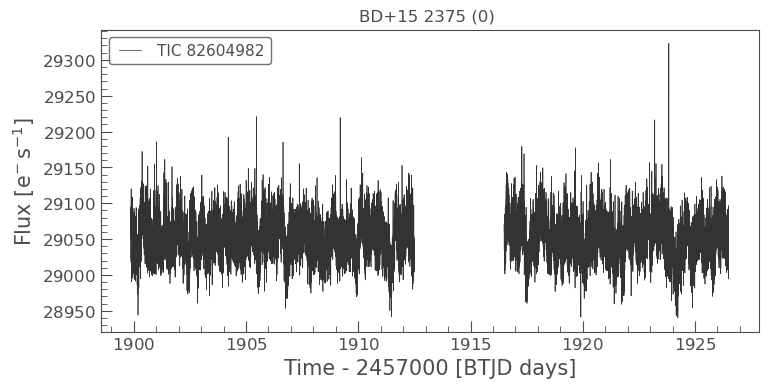

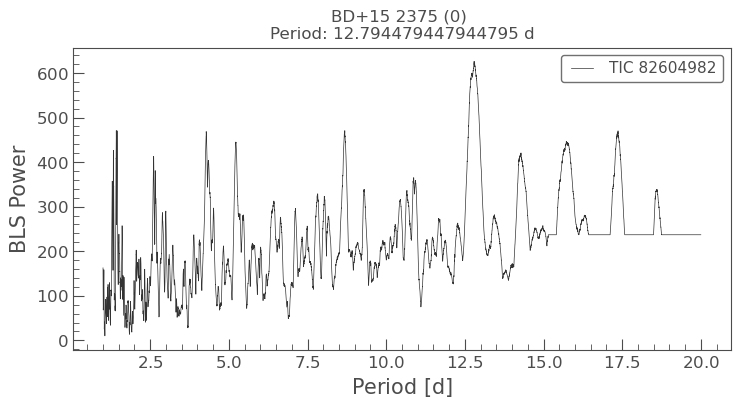

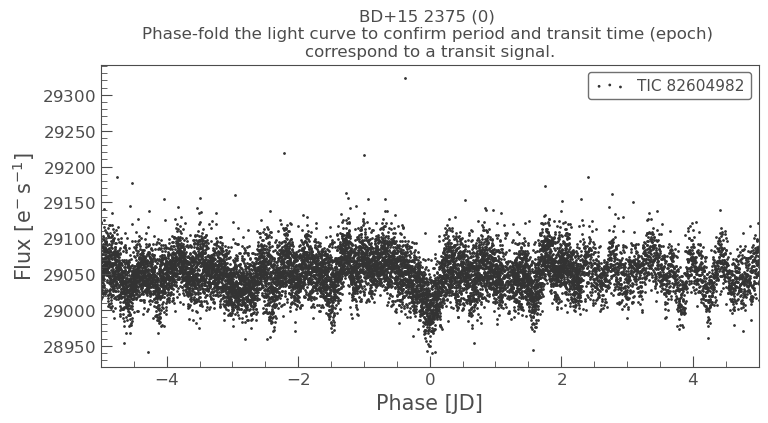

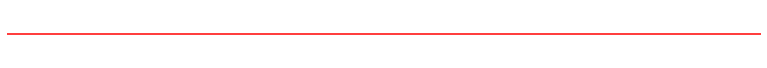

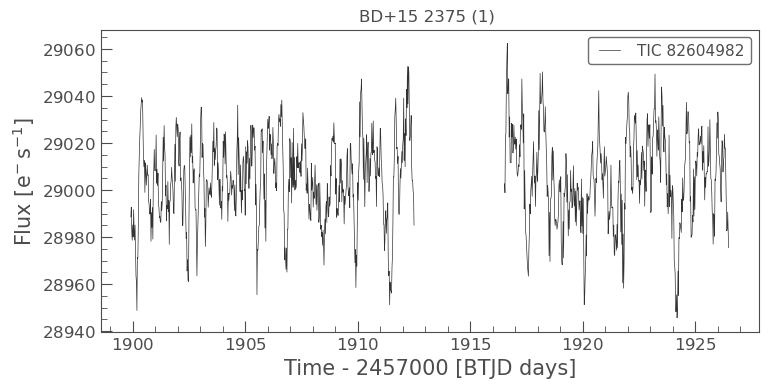

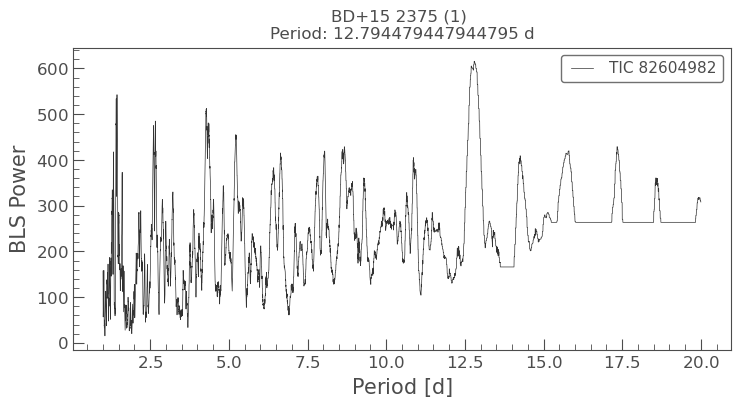

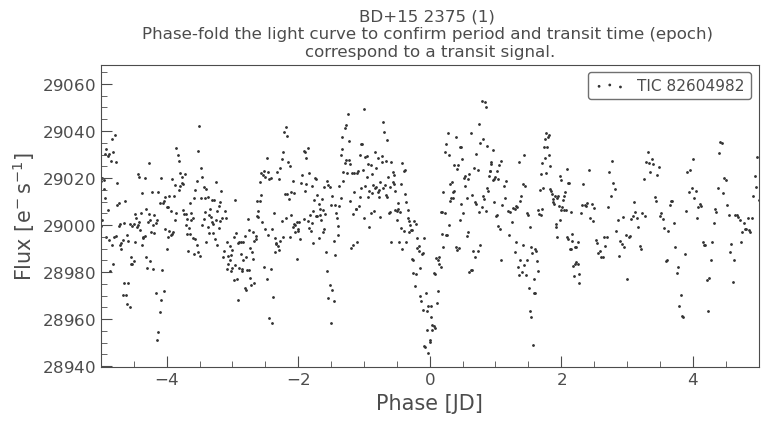

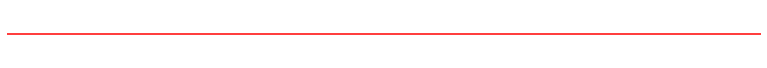

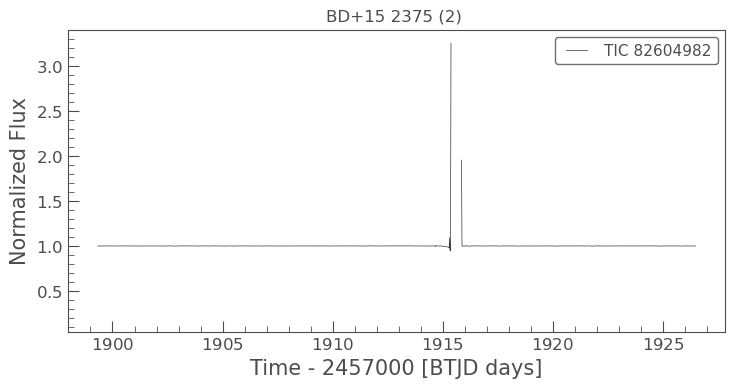

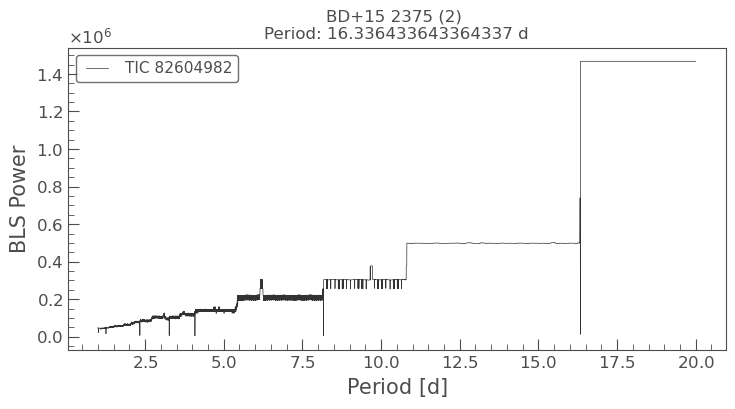

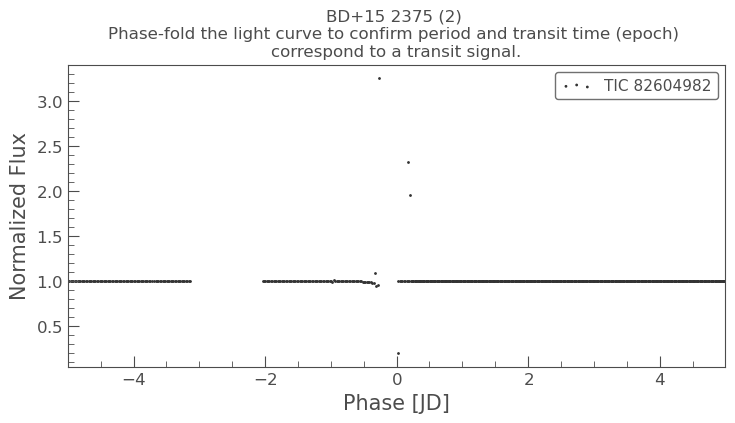

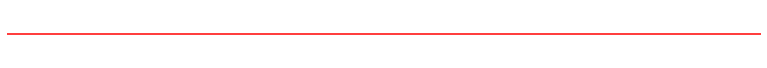

In [7]:
# Plot all entries

for i in range(0, int(len(search_result))):
     if search_result[i].author != 'K2SC':
          if search_result[i].author != 'K2VARCAT':
               #if search_result[i].author != 'DIAMANTE':
                    #if search_result[i].author != 'QLP':
                         #if search_result[i].author != 'TASOC': 
                              PlotTarget2(target1, i, Target_Name)
                              
                         
# The plot below shows the power, or the likelihood of the BLS fit, for each of the periods in the array we passed in. 
# This plot shows a handful of high-power peaks at discrete periods, which is a good sign that a transit has been identified. 
# The highest power spike shows the most likely period, while the lower power spikes are fractional harmonics of the period, for example, 1/2, 1/3, 1/4, etc. 

In [ ]:
# Plot just the first ten entries

for i in range(0, 10):
    PlotTarget2(target1, i, Target_Name)

In [ ]:
# Plot just the next ten entries

for i in range(10, 20):
    PlotTarget2(target1, i, Target_Name)

In [ ]:
# Plot just the next ten entries

for i in range(20, 30):
    PlotTarget2(target1, i, Target_Name)

In [ ]:
# Plot just the next ten entries

for i in range(30, 40):
    PlotTarget2(target1, i, Target_Name)

In [ ]:
# Plot just the first half entries

for i in range(0, int(len(search_result)/2)):
     PlotTarget2(target1, i, Target_Name)

In [ ]:
# Plot just the last half entries

for i in range(int(len(search_result)/2),len(search_result)):
     PlotTarget2(target1, i, Target_Name)